In [1]:
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

In [8]:
def cv2_show(img: np.array, name: str = 'img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 图像阈值

```python
ret, dst = cv2.threshold(src, thresh, maxval, type)
```
- 输入
  - `src`：原始输入的图片
  - `thresh`：阈值
  - `maxval`：当像素超过阈值/低于阈值，赋予的值（由`type`决定）
  - `type`:二值化操作的类型：
    - `cv2.THRESH_BINARY`
    - `cv2.THRESH_TRUNC`
    - `cv2.THRESH_TOZERO`
    - `cv2.THRESH_TOZERO_INV`
    - `cv2.THRESH_OTSU`
- 输出
  - `res`:实际使用的阈值（float）
  - `dst`:阈值处理后的输出图像（ndarray）

In [3]:
img_gray = cv2.imread("../../../data/OpenCV-img/mountain.png", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/gray_mountain.png", img_gray)

True

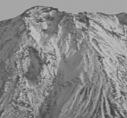

In [4]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/gray_mountain.png")

In [5]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

Text(0.5, 1.0, 'TOZERO_INV')

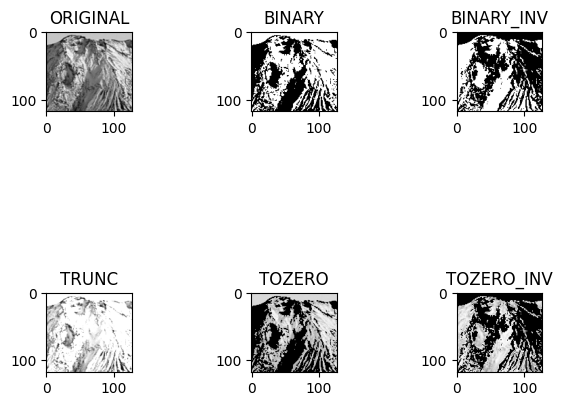

In [9]:
plt.subplot(3, 5, 1)
plt.imshow(img_gray, 'gray')
plt.title('ORIGINAL')

plt.subplot(3, 5, 3)
plt.imshow(thresh1, 'gray')
plt.title('BINARY')

plt.subplot(3, 5, 5)
plt.imshow(thresh2, 'gray')
plt.title('BINARY_INV')

plt.subplot(3, 5, 11)
plt.imshow(thresh3, 'gray')
plt.title('TRUNC')

plt.subplot(3, 5, 13)
plt.imshow(thresh4, 'gray')
plt.title('TOZERO')

plt.subplot(3, 5, 15)
plt.imshow(thresh5, 'gray')
plt.title('TOZERO_INV')

## 图像平滑

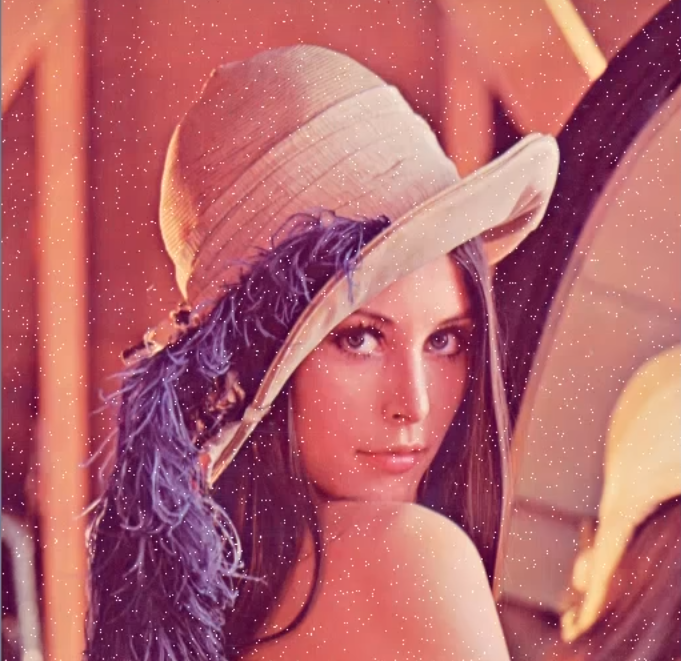

In [2]:
img = cv2.imread("../../../data/OpenCV-img/people.png")
display.Image("../../../data/OpenCV-img/people.png")

#### 均值滤波
简单的平均卷积操作

In [6]:
blur = cv2.blur(img, (5, 5))
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/mean_blur_people.png", blur)

True

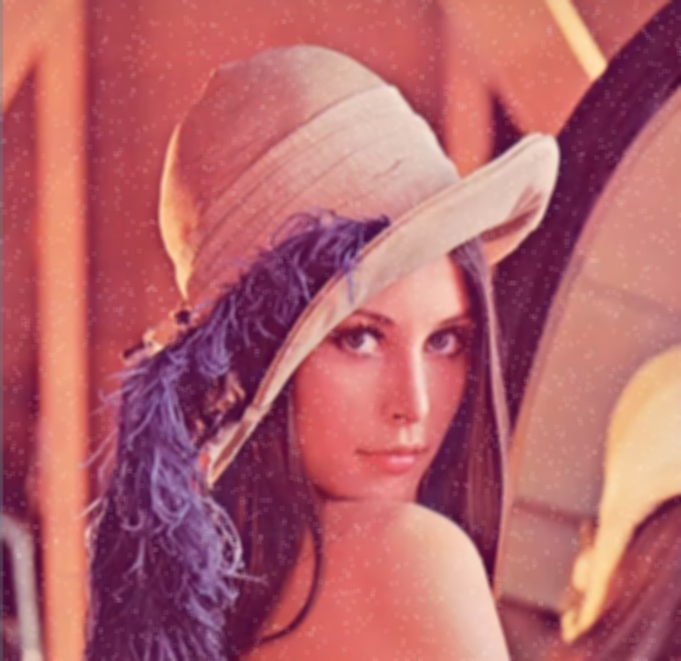

In [42]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/mean_blur_people.png")

#### 方框滤波
基本和上面的一致，但是可以作归一化

In [39]:
box = cv2.boxFilter(img, -1, (5, 5), normalize=True)
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/box_filter_people.png", box)

True

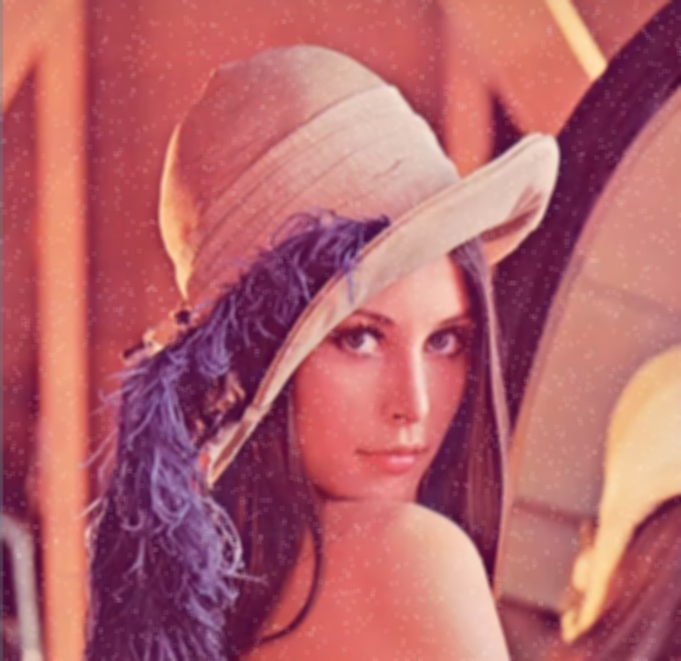

In [40]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/box_filter_people.png")

In [37]:
box = cv2.boxFilter(img, -1, (3, 3), normalize=False)
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/box_filter_no_normalize_people.png", box)

True

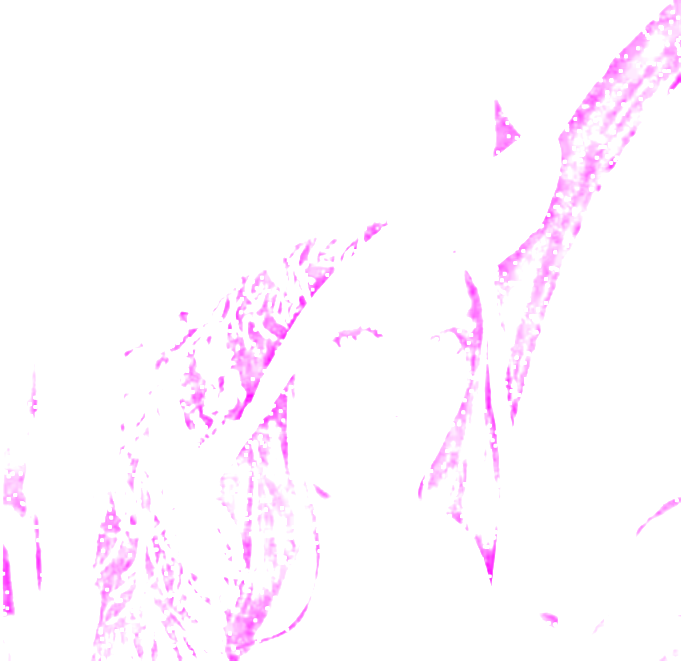

In [38]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/box_filter_no_normalize_people.png")


#### 高斯滤波
卷积核的数值分布符合高斯分布， 而不是固定值

In [7]:
gaussian =cv2.GaussianBlur(img, (5, 5), 1)
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/gaussian_blur_people.png", gaussian)

True

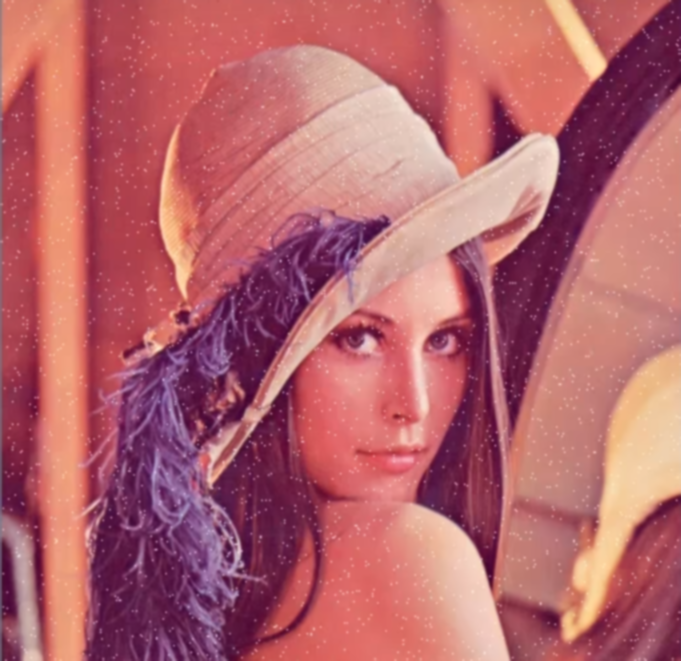

In [34]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/gaussian_blur_people.png")

#### 中值滤波
使用卷积核覆盖范围内的中值作为卷积核的值

In [8]:
median = cv2.medianBlur(img, 5)
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/median_blur_people.png", median)

True

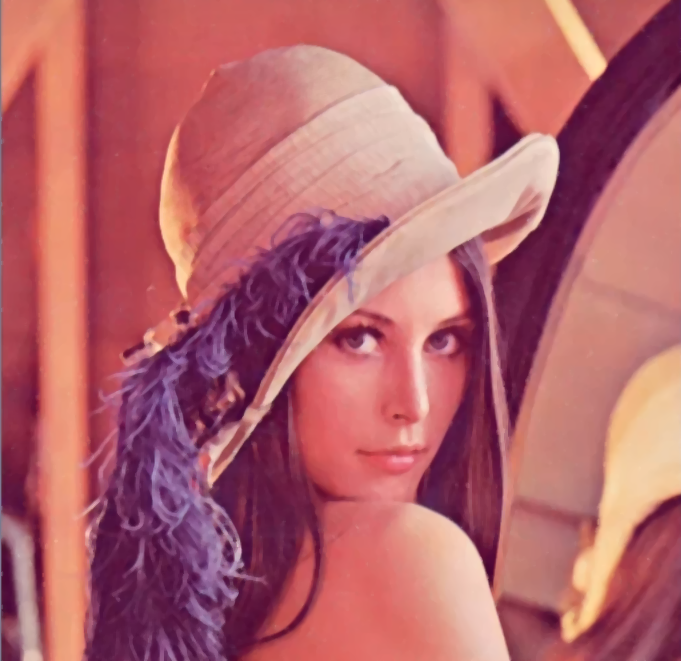

In [4]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/median_blur_people.png")

In [13]:
res = np.hstack((blur, gaussian, median))
cv2.imwrite("../../../artifacts/OpenCV/02threshold_and_blur/res_people.png", res)

True

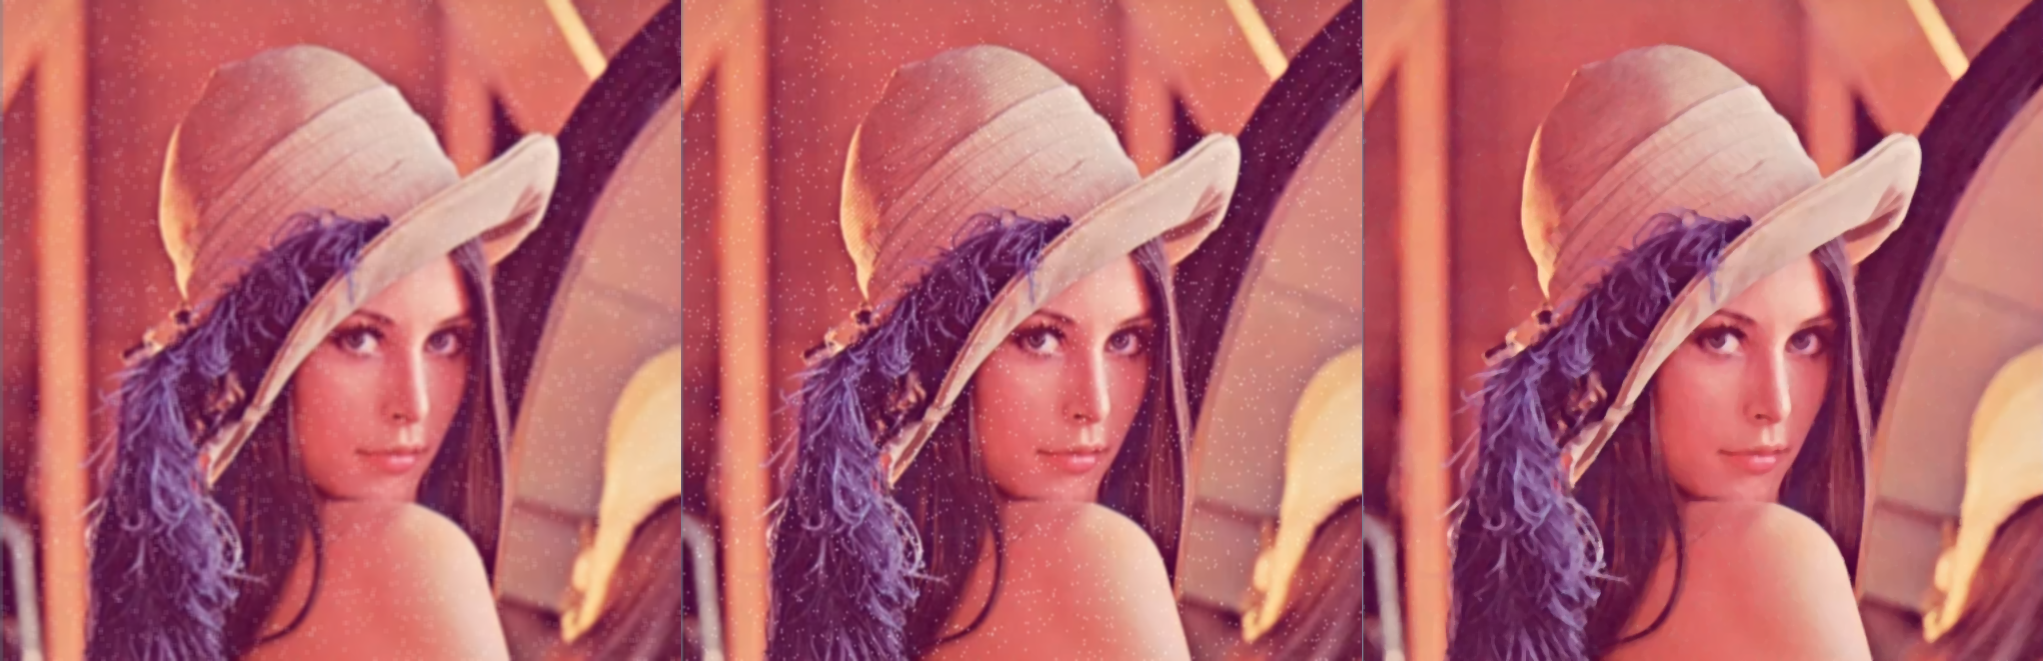

In [14]:
display.Image("../../../artifacts/OpenCV/02threshold_and_blur/res_people.png")